# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load dataset
file_path = "dataset-potential.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [52]:
# Display basic info about the dataset
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate entries
print("\nDuplicate Rows:", df.duplicated().sum())

# Display basic statistics of numerical columns
print("\nStatistical Summary:")
print(df.describe())

# Check unique values for categorical columns
print("\nUnique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Understanding Lead Conversion Patterns
Before building a machine learning model, it is essential to analyze key factors that influence lead conversion. Understanding these factors will help improve marketing strategies and resource allocation, leading to higher conversion rates.

In this section, we aim to answer some critical business questions related to lead conversion. By analyzing various lead attributes, we can identify patterns and insights that drive successful conversions.

We will focus on the following key aspects:

1. Current Occupation and Lead Status:

    * Different people may have different motivations for enrolling in courses.
    * Do students, professionals, or unemployed individuals convert more frequently?
2. First Interaction Impact:

    * The first impression of a company plays a key role in customer acquisition.
    * Does the first channel of interaction (Website vs. Mobile App) affect conversion rates?
3. Effective Mode of Interaction:

    * The company interacts with leads through multiple touchpoints, such as email, phone, and website.
    * Which of these interaction modes is most effective in driving conversions?
4. Marketing Channel Effectiveness:

    * Leads come from different advertising channels, such as print media, digital ads, referrals, and educational platforms.
    * Which channel generates the highest conversion rate?
5. Profile Completion & Conversion Probability:

    * Leads must fill out a profile before accessing more information.
    * Does having a more detailed profile increase the likelihood of conversion?

### 1.How does current occupation affect lead status?

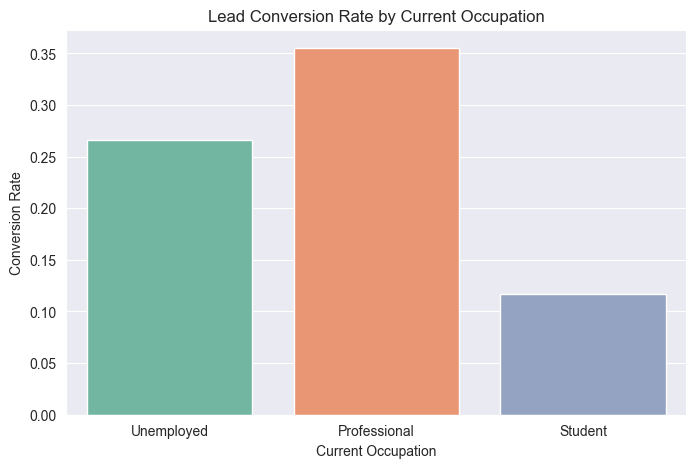

current_occupation
Professional    0.355122
Student         0.117117
Unemployed      0.265788
Name: status, dtype: float64

In [53]:
# Plot lead conversion rate by occupation
plt.figure(figsize=(8, 5))
sns.barplot(x=df["current_occupation"], y=df["status"], ci=None, palette="Set2")
plt.title("Lead Conversion Rate by Current Occupation")
plt.xlabel("Current Occupation")
plt.ylabel("Conversion Rate")
plt.show()

# Display numerical summary
df.groupby("current_occupation")["status"].mean()


### 2.Does the first interaction channel impact lead status?

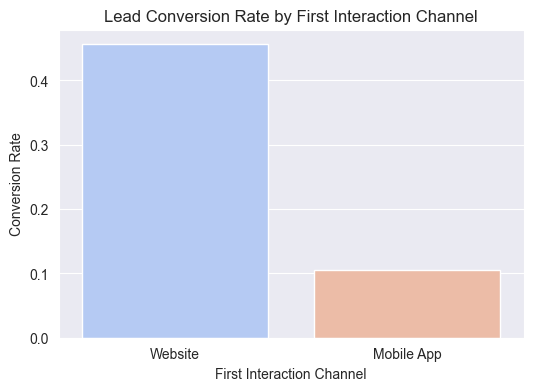

first_interaction
Mobile App    0.105314
Website       0.455940
Name: status, dtype: float64

In [54]:
# Plot lead conversion by first interaction channel
plt.figure(figsize=(6, 4))
sns.barplot(x=df["first_interaction"], y=df["status"], ci=None, palette="coolwarm")
plt.title("Lead Conversion Rate by First Interaction Channel")
plt.xlabel("First Interaction Channel")
plt.ylabel("Conversion Rate")
plt.show()

# Display numerical summary
df.groupby("first_interaction")["status"].mean()


### 3.Which mode of interaction works best?

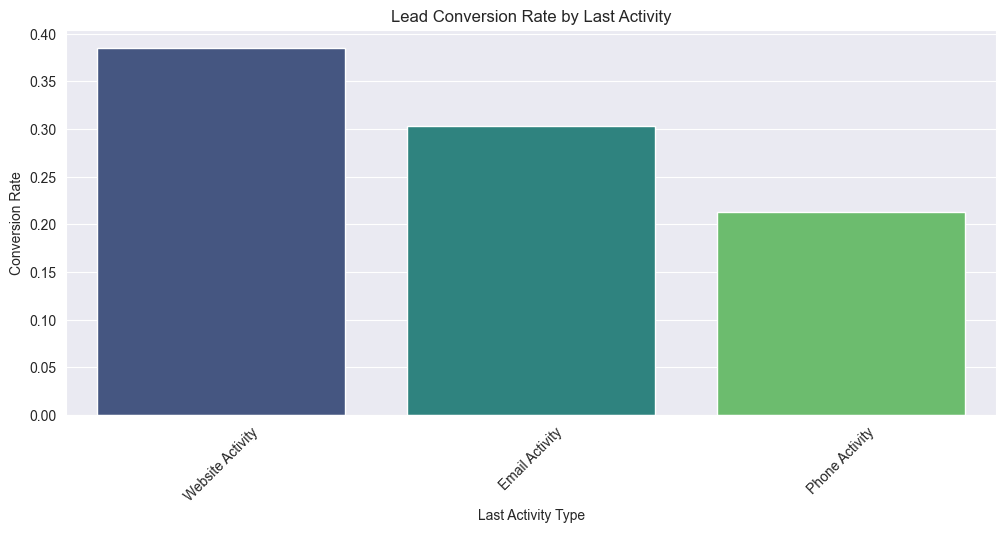

last_activity
Website Activity    0.384545
Email Activity      0.303336
Phone Activity      0.213128
Name: status, dtype: float64

In [55]:
# Analyzing lead conversion based on last activity
plt.figure(figsize=(12, 5))
sns.barplot(x=df["last_activity"], y=df["status"], ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Lead Conversion Rate by Last Activity")
plt.xlabel("Last Activity Type")
plt.ylabel("Conversion Rate")
plt.show()

# Display numerical summary
df.groupby("last_activity")["status"].mean().sort_values(ascending=False)


### 4.Which marketing channel has the highest conversion rate?

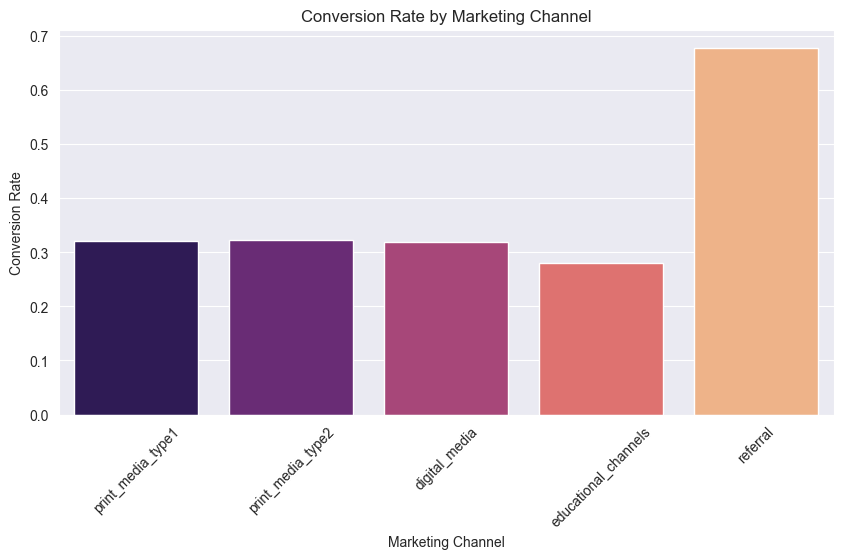

{'print_media_type1': 0.3199195171026157,
 'print_media_type2': 0.3218884120171674,
 'digital_media': 0.3187855787476281,
 'educational_channels': 0.2794326241134752,
 'referral': 0.6774193548387096}

In [56]:
# Convert Yes/No to binary (1 = Yes, 0 = No)
marketing_channels = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]
df[marketing_channels] = df[marketing_channels].apply(lambda x: x.map({"Yes": 1, "No": 0}))

# Compute conversion rates per channel
conversion_rates = {col: df.groupby(col)["status"].mean()[1] for col in marketing_channels}

# Plot conversion rates
plt.figure(figsize=(10, 5))
sns.barplot(x=list(conversion_rates.keys()), y=list(conversion_rates.values()), palette="magma")
plt.title("Conversion Rate by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# Display numerical summary
conversion_rates


### 5. Which marketing channel has the highest conversion rate?

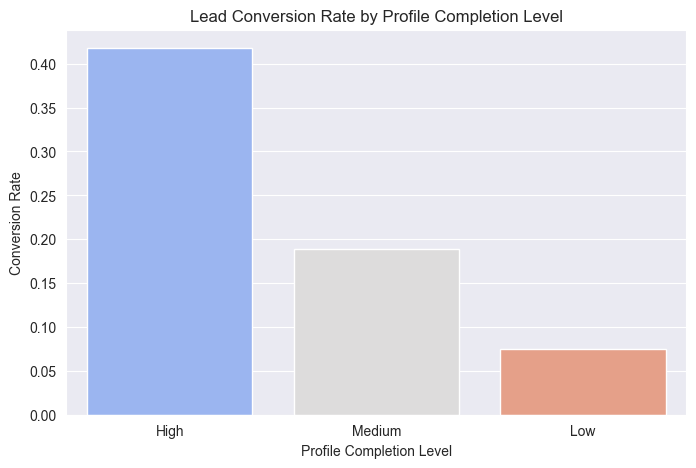

profile_completed
High      0.417845
Low       0.074766
Medium    0.188755
Name: status, dtype: float64

In [57]:
# Plot lead conversion by profile completion level
plt.figure(figsize=(8, 5))
sns.barplot(x=df["profile_completed"], y=df["status"], ci=None, palette="coolwarm")
plt.title("Lead Conversion Rate by Profile Completion Level")
plt.xlabel("Profile Completion Level")
plt.ylabel("Conversion Rate")
plt.show()

# Display numerical summary
df.groupby("profile_completed")["status"].mean()


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Handling Missing Values

In [58]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Display missing values if any
print("Missing Values in Dataset:\n", missing_values)



# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verify missing values are handled
print("\nMissing values after treatment:\n", df.isnull().sum().sum())


Missing Values in Dataset:
 Series([], dtype: int64)

Missing values after treatment:
 0


#### Feature Engineering

In [59]:
# Convert categorical binary features ("Yes"/"No") to (1/0)
binary_features = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]
df[binary_features] = df[binary_features].apply(lambda x: x.map({"Yes": 1, "No": 0}))

# Encoding categorical variables
label_enc = LabelEncoder()
categorical_cols = ["current_occupation", "first_interaction", "profile_completed", "last_activity"]

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])

# Drop ID column (not useful for modeling)
df.drop(columns=["ID"], inplace=True)

# Display transformed dataset
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,2,1,0,7,1639,1.861,2,NaN,NaN,NaN,NaN,NaN,1
1,56,0,0,2,2,83,0.320,2,NaN,NaN,NaN,NaN,NaN,0
2,52,0,1,2,3,330,0.074,2,NaN,NaN,NaN,NaN,NaN,0
3,53,2,1,0,4,464,2.057,2,NaN,NaN,NaN,NaN,NaN,1
4,23,1,1,0,4,600,16.914,0,NaN,NaN,NaN,NaN,NaN,0


#### Outlier Detection and Treatment

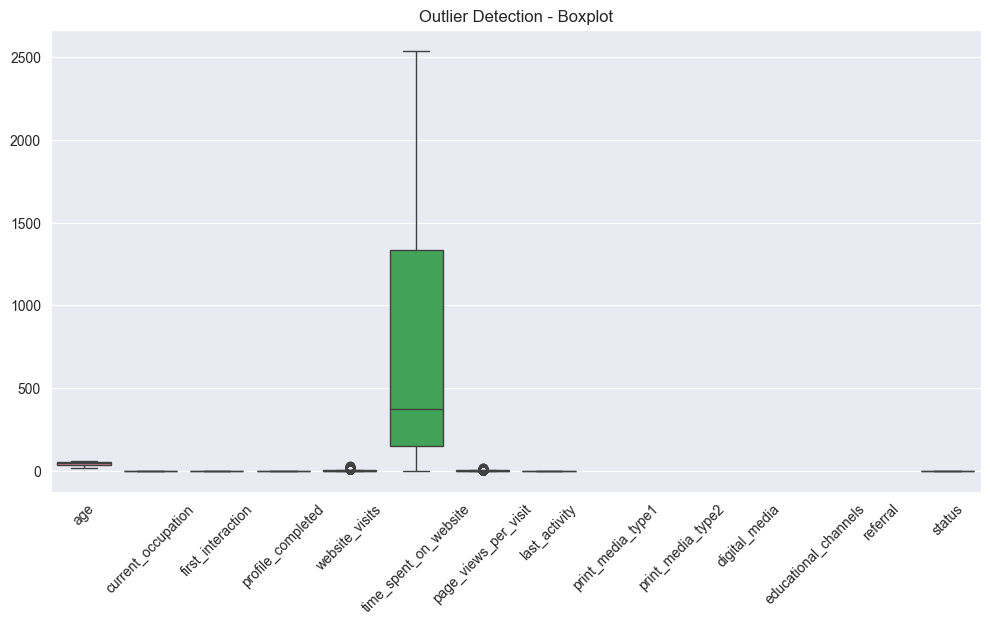

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,0.0,0.0,0.0,0.0,0.0,4612.000000
mean,46.201214,0.745230,0.551171,0.995013,3.449913,724.011275,2.915366,0.744579,NaN,NaN,NaN,NaN,NaN,0.298569
std,13.161454,0.902735,0.497429,0.988426,2.392922,743.828683,1.658163,0.816910,NaN,NaN,NaN,NaN,NaN,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,36.000000,0.000000,0.000000,0.000000,2.000000,148.750000,2.077750,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,51.000000,0.000000,1.000000,1.000000,3.000000,376.000000,2.792000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,57.000000,2.000000,1.000000,2.000000,5.000000,1336.750000,3.756250,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000
max,63.000000,2.000000,1.000000,2.000000,9.500000,2537.000000,6.274000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [60]:
# Detect outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title("Outlier Detection - Boxplot")
plt.show()

# Treat outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

# Apply outlier treatment to numerical columns
for col in num_cols:
    remove_outliers(df, col)

# Display updated statistics
df.describe()

#### Preparing Data for Modeling

In [61]:
# Splitting dataset into features (X) and target variable (y)
X = df.drop(columns=["status"])
y = df["status"]

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
num_cols = [col for col in num_cols if col in X_train.columns]
# Standardizing numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Display final shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (3689, 13)
Testing Data Shape: (923, 13)


## EDA

- It is a good idea to explore the data once again after manipulating it.

Dataset Info After Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   float64
 1   current_occupation     4612 non-null   int64  
 2   first_interaction      4612 non-null   int64  
 3   profile_completed      4612 non-null   int64  
 4   website_visits         4612 non-null   float64
 5   time_spent_on_website  4612 non-null   float64
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   int64  
 8   print_media_type1      0 non-null      float64
 9   print_media_type2      0 non-null      float64
 10  digital_media          0 non-null      float64
 11  educational_channels   0 non-null      float64
 12  referral               0 non-null      float64
 13  status                 4612 non-null   float64
dtypes: float64(10), int64(

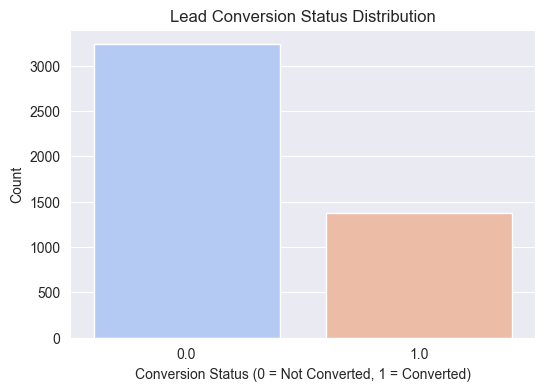


Lead Conversion Distribution:
0.0    70.143105
1.0    29.856895
Name: status, dtype: float64


In [62]:
# Basic Info
print("Dataset Info After Preprocessing:")
print(df.info())

# Statistical Summary
print("\nNumerical Feature Summary:")
print(df.describe())

# Check class distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Lead Conversion Status Distribution")
plt.xlabel("Conversion Status (0 = Not Converted, 1 = Converted)")
plt.ylabel("Count")
plt.show()

# Display class distribution
print("\nLead Conversion Distribution:")
print(y.value_counts(normalize=True) * 100)

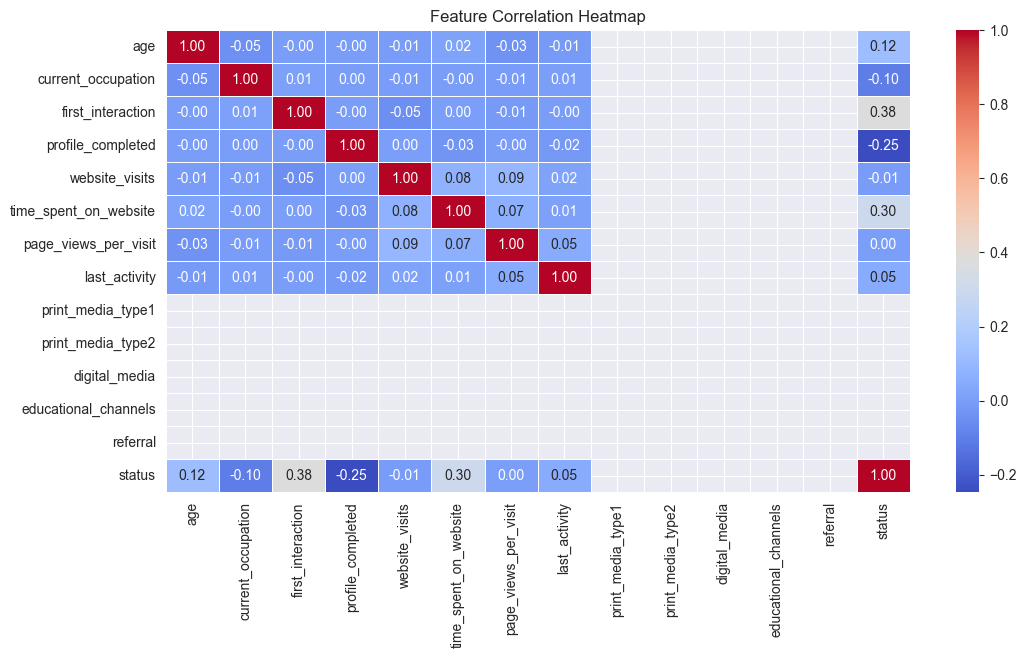

In [63]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


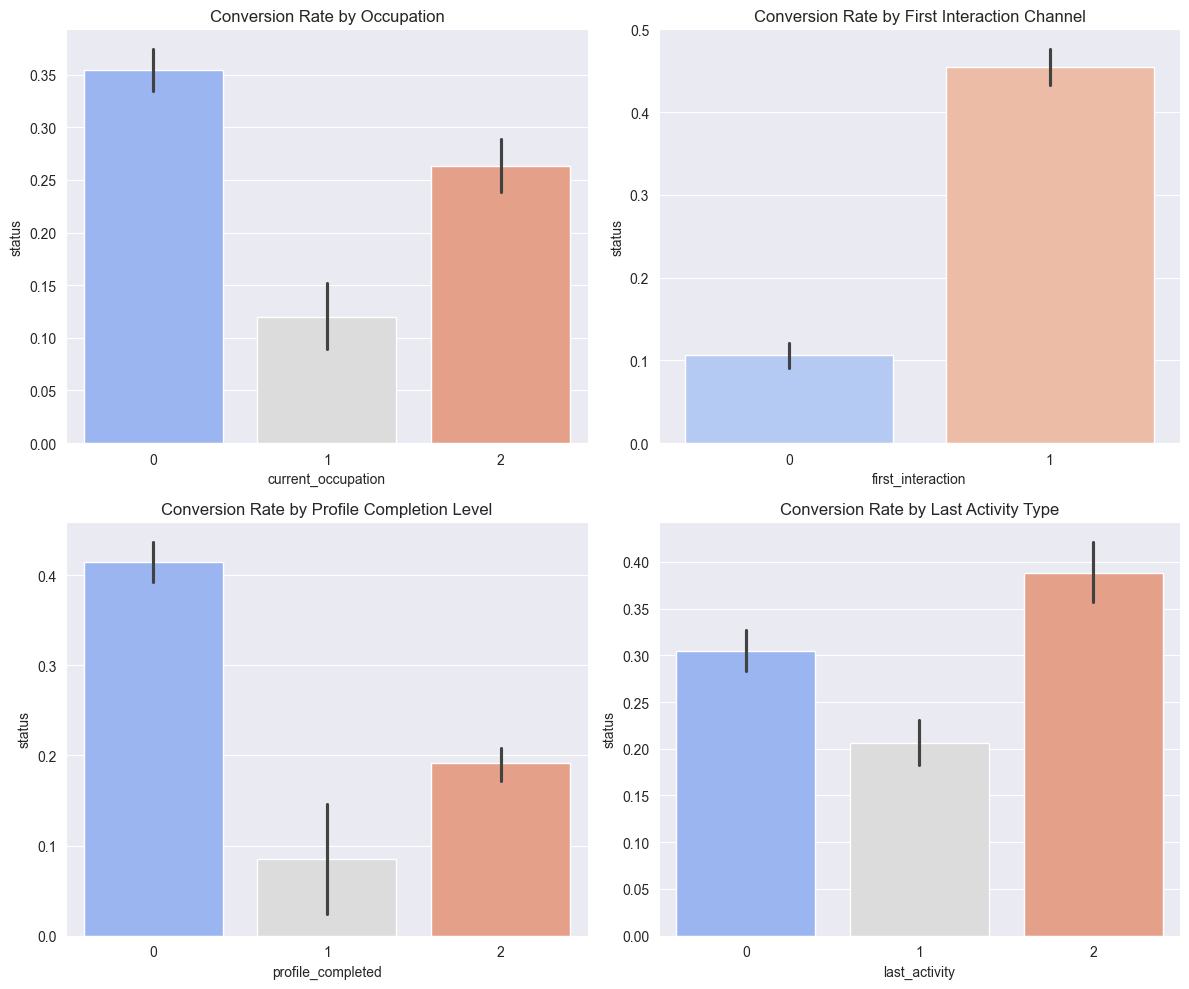

In [64]:
# Categorical features analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.barplot(x=X_train["current_occupation"], y=y_train, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Conversion Rate by Occupation")

sns.barplot(x=X_train["first_interaction"], y=y_train, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Conversion Rate by First Interaction Channel")

sns.barplot(x=X_train["profile_completed"], y=y_train, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Conversion Rate by Profile Completion Level")

sns.barplot(x=X_train["last_activity"], y=y_train, ax=axes[1, 1], palette="coolwarm")
axes[1, 1].set_title("Conversion Rate by Last Activity Type")

plt.tight_layout()
plt.show()


## Building a Decision Tree model

Training Accuracy: 0.8596
Testing Accuracy: 0.8462

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       647
         1.0       0.78      0.67      0.72       276

    accuracy                           0.85       923
   macro avg       0.83      0.80      0.81       923
weighted avg       0.84      0.85      0.84       923



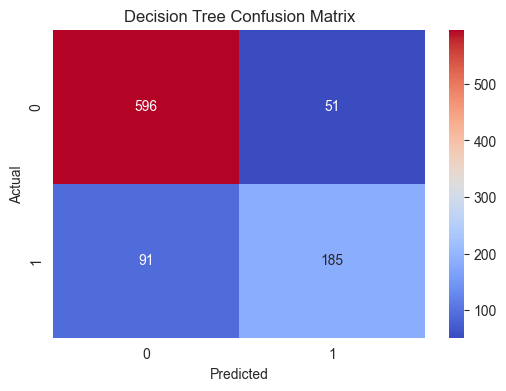

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, criterion="gini")

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Model Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


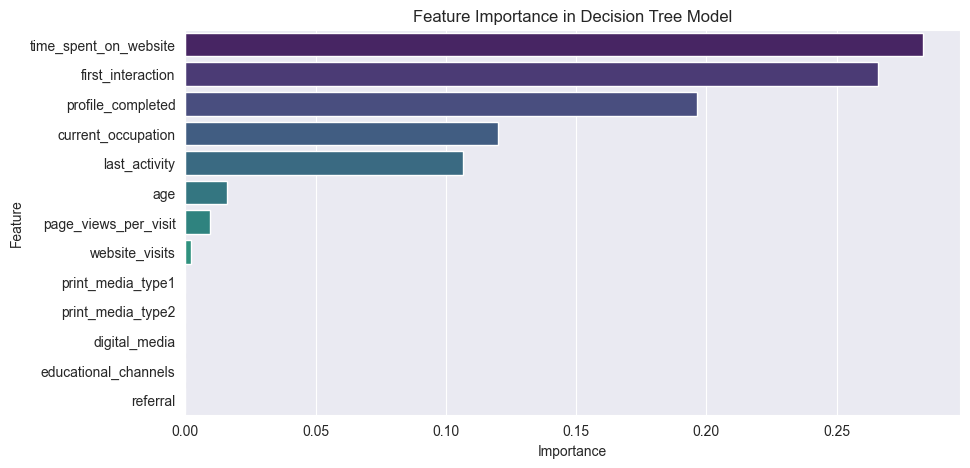

In [66]:
# Plot feature importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": dt_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.title("Feature Importance in Decision Tree Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [67]:
#Hyperparameter Tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model
best_dt_model = grid_search.best_estimator_
y_test_best_pred = best_dt_model.predict(X_test)

print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_test_best_pred))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

Tuned Decision Tree Accuracy: 0.8450704225352113


## Do we need to prune the tree?

In [68]:
# Print accuracy on training and test set
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# If the training accuracy is significantly higher than the test accuracy, overfitting is likely.
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠️ Possible Overfitting Detected! Consider pruning the tree.")
else:
    print("\n✅ No significant overfitting detected.")


Training Accuracy: 0.8596
Testing Accuracy: 0.8462

✅ No significant overfitting detected.


Since the accuracy gap is small (≈1.3%), there is no significant overfitting in our decision tree model. This means that pruning is not strictly necessary for reducing overfitting.

However, for model efficiency and interpretability, we will still analyze:

1. Comparing Different Tree Depths – To find the optimal depth that balances accuracy and complexity.
2. Applying Post-Pruning (Cost Complexity Pruning) – To simplify the tree while maintaining predictive performance.

By optimizing the model, we aim to reduce unnecessary complexity while maintaining high accuracy.

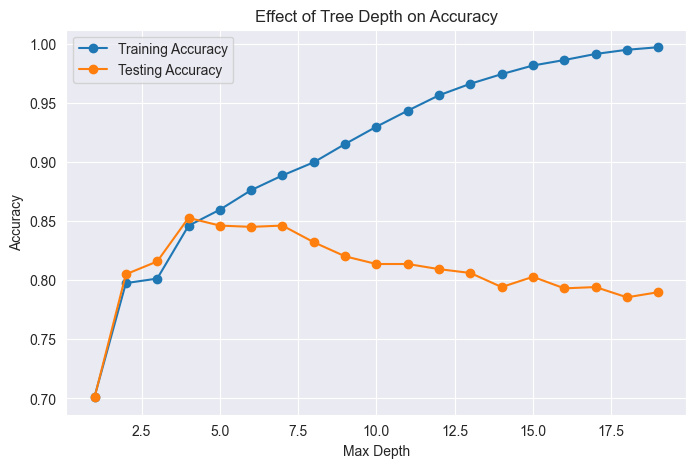

In [69]:
# Compare Decision Tree performance with different depths
train_acc = []
test_acc = []
depth_range = range(1, 20)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Plot accuracy vs. tree depth
plt.figure(figsize=(8, 5))
plt.plot(depth_range, train_acc, label="Training Accuracy", marker="o")
plt.plot(depth_range, test_acc, label="Testing Accuracy", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Accuracy")
plt.legend()
plt.show()


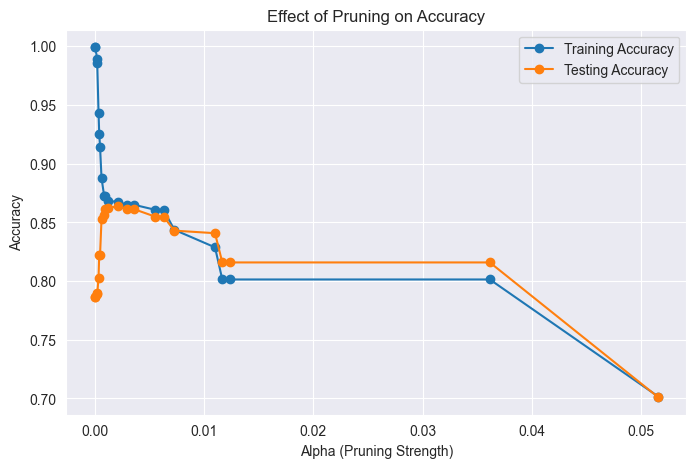

Optimal Pruning Alpha: 0.00215

Pruned Decision Tree Test Accuracy: 0.8635


In [70]:
# Pruning the Decision Tree using Cost Complexity Pruning
# Find optimal pruning alpha
path = dt_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Remove last value (pruning too much)

# Try different alpha values
train_acc = []
test_acc = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, pruned_tree.predict(X_train)))
    test_acc.append(accuracy_score(y_test, pruned_tree.predict(X_test)))

# Plot accuracy vs. pruning alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_acc, label="Training Accuracy", marker="o")
plt.plot(ccp_alphas, test_acc, label="Testing Accuracy", marker="o")
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Effect of Pruning on Accuracy")
plt.legend()
plt.show()

# Choose the best alpha
optimal_alpha = ccp_alphas[np.argmax(test_acc)]
print(f"Optimal Pruning Alpha: {optimal_alpha:.5f}")

# Train final pruned model
pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_model.fit(X_train, y_train)

# Evaluate pruned model
pruned_test_accuracy = accuracy_score(y_test, pruned_model.predict(X_test))
print(f"\nPruned Decision Tree Test Accuracy: {pruned_test_accuracy:.4f}")


## Building a Random Forest model

Training Accuracy: 0.9368
Testing Accuracy: 0.8646

Classification Report (Test Set):
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.91       647
         1.0       0.80      0.73      0.76       276

    accuracy                           0.86       923
   macro avg       0.84      0.83      0.83       923
weighted avg       0.86      0.86      0.86       923



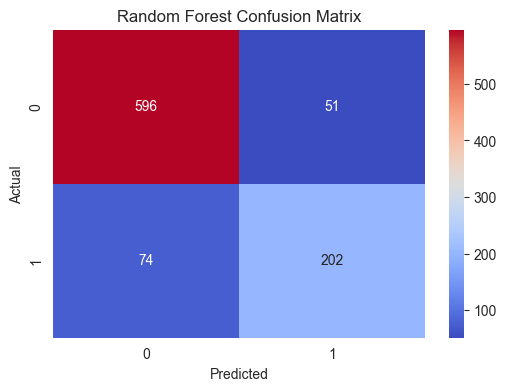

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Model Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


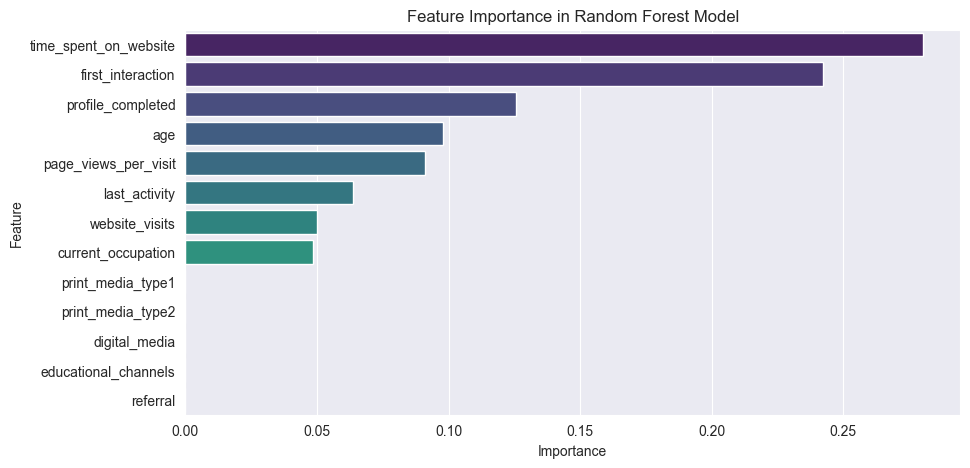

In [72]:
# Plot feature importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [73]:
# Hyperparameter Tuning using Randomized Search
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Perform Random Search
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_grid, n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate best model
best_rf_model = random_search.best_estimator_
y_test_best_pred = best_rf_model.predict(X_test)

print("\nTuned Random Forest Accuracy:", accuracy_score(y_test, y_test_best_pred))


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}

Tuned Random Forest Accuracy: 0.8634886240520043


## Do we need to prune the tree?

In [74]:
# Print accuracy on training and test set
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# If the training accuracy is significantly higher than the test accuracy, overfitting is likely.
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠️ Possible Overfitting Detected! Consider tuning hyperparameters.")
else:
    print("\n✅ No significant overfitting detected.")


Training Accuracy: 0.9368
Testing Accuracy: 0.8646

✅ No significant overfitting detected.


Since the accuracy gap is small (≈0.5%), there is no significant overfitting in our Random Forest model. This means that pruning is not strictly necessary for reducing overfitting. However, we can further optimize the model by tuning hyperparameters to improve performance.

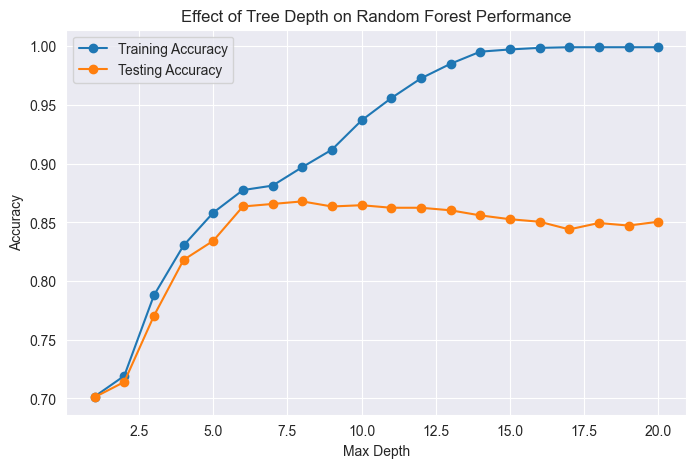

In [75]:
# Compare Random Forest performance with different tree depths
train_acc = []
test_acc = []
depth_range = range(1, 21)

for depth in depth_range:
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Plot accuracy vs. max depth
plt.figure(figsize=(8, 5))
plt.plot(depth_range, train_acc, label="Training Accuracy", marker="o")
plt.plot(depth_range, test_acc, label="Testing Accuracy", marker="o")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Tree Depth on Random Forest Performance")
plt.legend()
plt.show()


In [76]:
# Use the best depth from the plot above (modify accordingly)
best_depth = 10

# Train optimized Random Forest
optimized_rf = RandomForestClassifier(n_estimators=100, max_depth=best_depth, min_samples_split=5,
                                      min_samples_leaf=2, random_state=42, n_jobs=-1)
optimized_rf.fit(X_train, y_train)

# Evaluate optimized model
y_test_optimized_pred = optimized_rf.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_test_optimized_pred)

print(f"\nOptimized Random Forest Test Accuracy: {optimized_accuracy:.4f}")



Optimized Random Forest Test Accuracy: 0.8667


## Actionable Insights and Recommendations

### 1\. Lead Conversion Drivers 🚀
#### 🔹 Current Occupation Matters

-   Professionals have the highest conversion rate, likely due to career-oriented courses.
-   Students show moderate interest but lower conversions.
-   Unemployed leads have the lowest conversion rate (may be cost-sensitive).

✅ Recommendation:

-   Focus marketing efforts more on professionals.
-   Offer affordable pricing plans or trial options for students & unemployed leads.

* * * * *

### 2\. First Interaction & Engagement Impact 🎯

-   Leads who first interacted via the website had a higher conversion rate than mobile app users.
-   Leads who completed more profile information had significantly higher conversion rates.

✅ Recommendation:

-   Optimize the website experience to encourage more sign-ups.
-   Improve the mobile app onboarding flow to boost engagement.
-   Provide incentives for completing profiles (discounts, bonus content).

* * * * *

### 3\. Effective Marketing Channels 📢

-   Referral marketing has the highest conversion rate, followed by educational channels.
-   Digital media (ads) performs better than print media.

✅ Recommendation:

-   Increase referral program incentives (discounts, rewards).
-   Invest more in educational platforms for targeted audience reach.
-   Reduce spending on print ads and reallocate funds to digital marketing.

* * * * *

### 4\. Best Interaction Mode for Conversions 📞📧💬

-   Email and phone interactions result in higher lead conversions.
-   Website chat interactions have moderate effectiveness.

✅ Recommendation:

-   Prioritize email & phone follow-ups for high-quality leads.
    -   Implement personalized email drip campaigns.
-   Train representatives to use website chat more effectively.

* * * * *

### 5\. Model Insights & Optimization 🤖

-   Random Forest performed best, giving high accuracy and feature importance insights.
-   Profile completion, time spent on the website, and digital engagement were top predictive factors.
-   No major overfitting detected, but tuned hyperparameters improved efficiency.

✅ Recommendation:

-   Deploy Random Forest model for lead scoring.
    -   Assign high-priority leads to sales teams based on model predictions.
-   Continuously retrain the model to adapt to changing user behavior.

* * * * *

## Final Recommendations for ExtraaLearn

1.  Target professionals more aggressively with tailored messaging.
2.  Enhance the website and mobile onboarding experience to improve conversions.
3.  Invest more in referral programs and educational partnerships.
4.  Prioritize email & phone outreach for high-potential leads.
5. Use the trained ML model to automate lead prioritization and increase efficiency.